In [41]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
train_df = pd.read_csv("train.csv")

In [43]:
train_df.head()

,Id,Therapy Hours,Initial Health Score,Lifestyle Activities,Average Sleep Hours,Follow-Up Sessions,Recovery Index
0,9255,5,49,No,7,5,36
1,1562,2,48,Yes,7,6,25
2,1671,2,81,No,7,2,59
3,6088,2,46,No,6,1,22
4,6670,8,47,No,9,0,40


In [44]:
train_df.shape

(8000, 7)

In [45]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Id                    8000 non-null   int64 
 1   Therapy Hours         8000 non-null   int64 
 2   Initial Health Score  8000 non-null   int64 
 3   Lifestyle Activities  8000 non-null   object
 4   Average Sleep Hours   8000 non-null   int64 
 5   Follow-Up Sessions    8000 non-null   int64 
 6   Recovery Index        8000 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 437.6+ KB


In [46]:
train_df.isna().sum()

Id                      0
Therapy Hours           0
Initial Health Score    0
Lifestyle Activities    0
Average Sleep Hours     0
Follow-Up Sessions      0
Recovery Index          0
dtype: int64

In [47]:
train_df.drop_duplicates(inplace=True)

In [48]:
train_df.shape

(8000, 7)

No duplicates or null values

In [49]:
train_df.describe()

,Id,Therapy Hours,Initial Health Score,Average Sleep Hours,Follow-Up Sessions,Recovery Index
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,5012.506875,4.983250,69.531000,6.541625,4.616500,55.311500
std,2887.649416,2.594862,17.343735,1.698493,2.861241,19.202059
min,2.000000,1.000000,40.000000,4.000000,0.000000,10.000000
25%,2512.750000,3.000000,54.750000,5.000000,2.000000,40.000000
50%,5014.500000,5.000000,70.000000,7.000000,5.000000,55.000000
75%,7505.250000,7.000000,85.000000,8.000000,7.000000,71.000000
max,10000.000000,9.000000,99.000000,9.000000,9.000000,100.000000


<Axes: xlabel='Average Sleep Hours', ylabel='Count'>

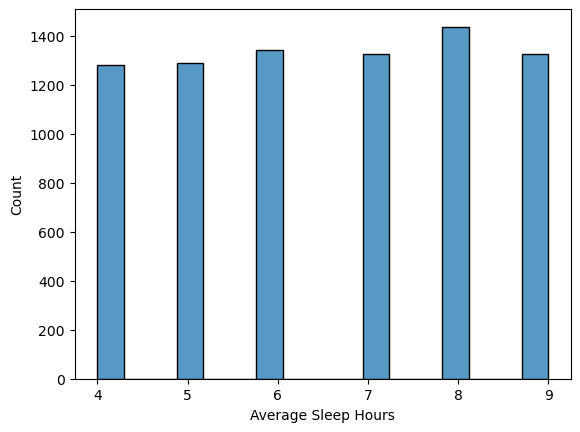

In [50]:
sns.histplot(train_df["Average Sleep Hours"])

No invalid sleep hours values from above

In [51]:
train_df["Lifestyle Activities"].value_counts()

Lifestyle Activities
No     4043
Yes    3957
Name: count, dtype: int64

In [52]:
train_df["Follow-Up Sessions"].value_counts()

Follow-Up Sessions
6    862
9    857
5    833
3    815
8    811
7    804
4    772
0    757
1    745
2    744
Name: count, dtype: int64

No invalid follow-up session values from above

<Axes: xlabel='Therapy Hours', ylabel='Count'>

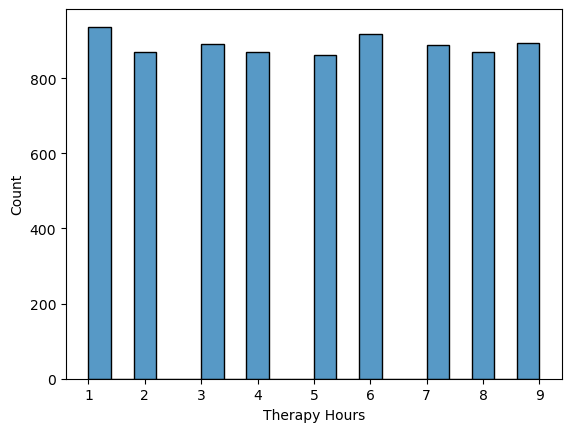

In [53]:
sns.histplot(train_df['Therapy Hours'])

In [54]:
train_df["Therapy Hours"].value_counts()

Therapy Hours
1    937
6    917
9    894
3    891
7    889
2    871
8    869
4    869
5    863
Name: count, dtype: int64

No invalid Therapy Hours from above

<Axes: xlabel='Initial Health Score', ylabel='Count'>

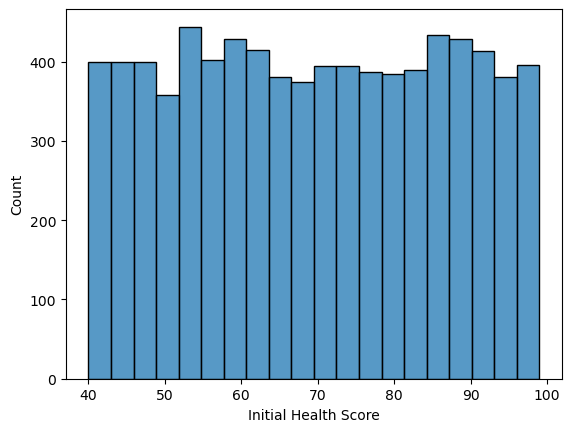

In [55]:
sns.histplot(train_df['Initial Health Score'])

<Axes: ylabel='Initial Health Score'>

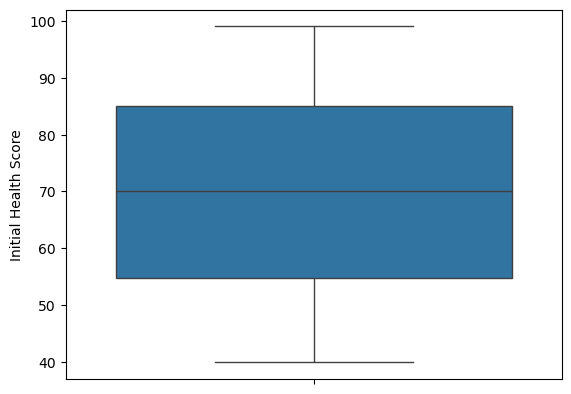

In [56]:
sns.boxplot(train_df['Initial Health Score'])

<Axes: ylabel='Therapy Hours'>

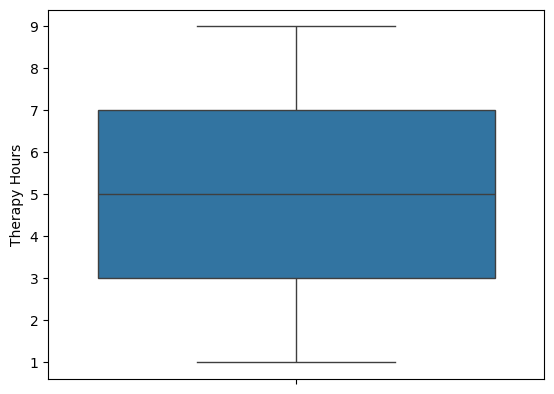

In [57]:
sns.boxplot(train_df['Therapy Hours'])

<Axes: ylabel='Average Sleep Hours'>

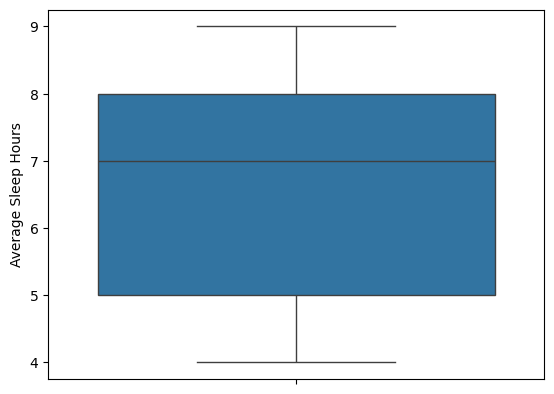

In [58]:
sns.boxplot(train_df['Average Sleep Hours'])

<Axes: ylabel='Follow-Up Sessions'>

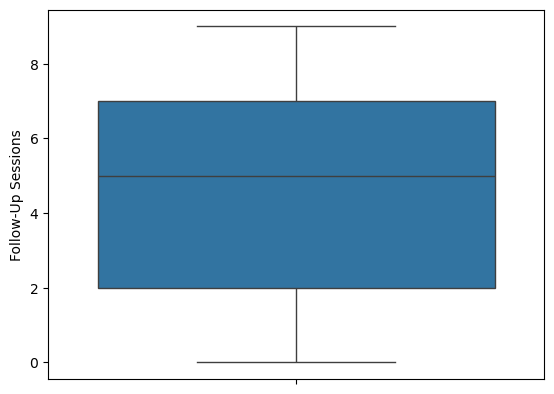

In [59]:
sns.boxplot(train_df['Follow-Up Sessions'])

<Axes: ylabel='Recovery Index'>

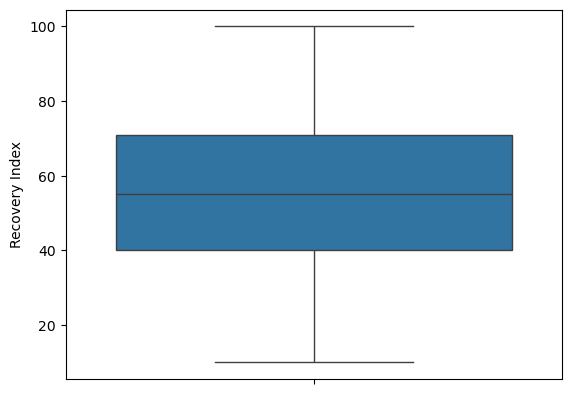

In [60]:
sns.boxplot(train_df['Recovery Index'])

<Axes: xlabel='Recovery Index', ylabel='Count'>

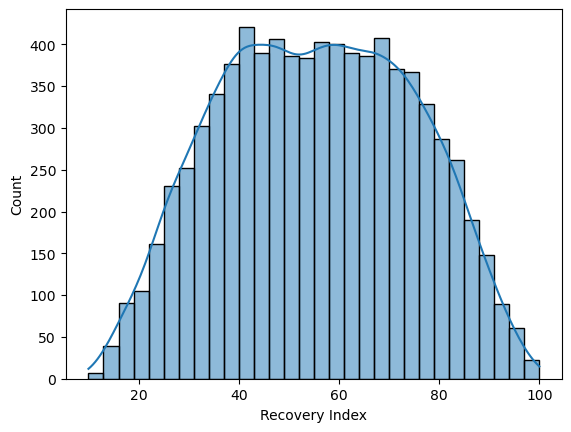

In [61]:
sns.histplot(data=train_df, x='Recovery Index', bins=30, kde=True)

<Axes: xlabel='Initial Health Score', ylabel='Recovery Index'>

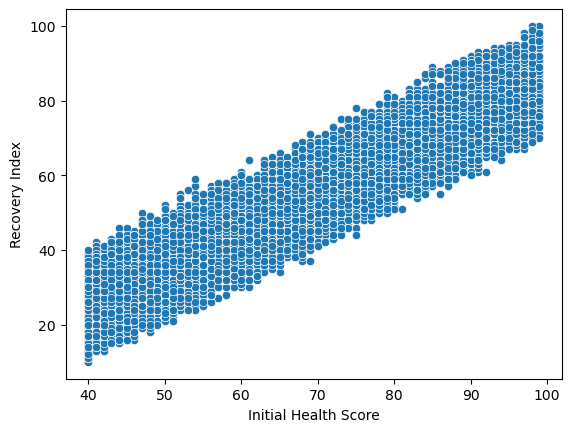

In [62]:
sns.scatterplot(data=train_df, x='Initial Health Score', y='Recovery Index')

<Axes: xlabel='Therapy Hours', ylabel='Recovery Index'>

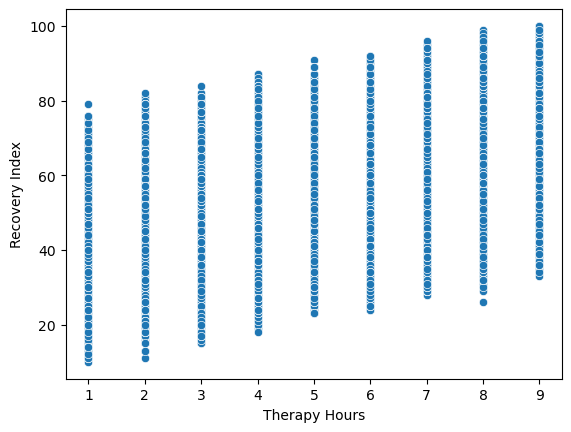

In [63]:
sns.scatterplot(data=train_df, x='Therapy Hours', y='Recovery Index')

In [64]:
processed_df = pd.get_dummies(train_df, columns=['Lifestyle Activities'], drop_first=True)

<Axes: >

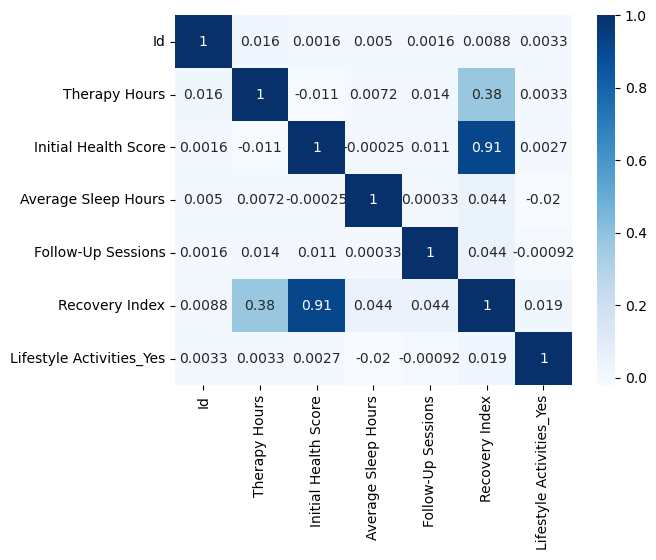

In [65]:
sns.heatmap(processed_df.corr(), annot=True, cmap='Blues')

In [66]:
processed_df.drop("Id", axis=1, inplace=True)

<Axes: >

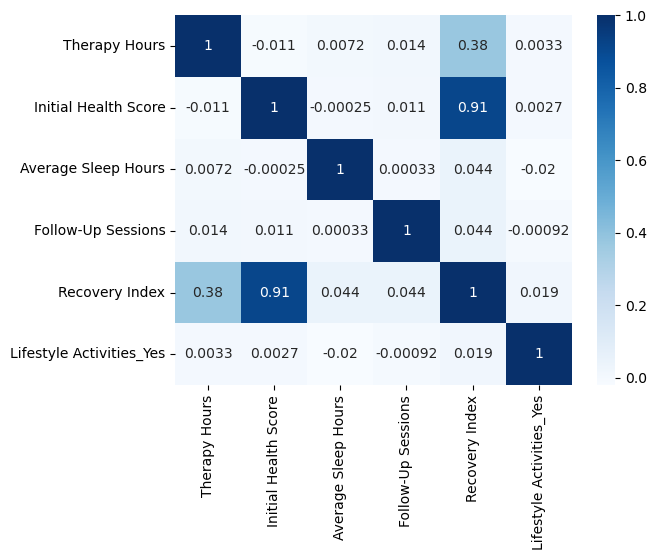

In [67]:
sns.heatmap(processed_df.corr(), annot=True, cmap='Blues')

<Axes: xlabel='Average Sleep Hours', ylabel='Recovery Index'>

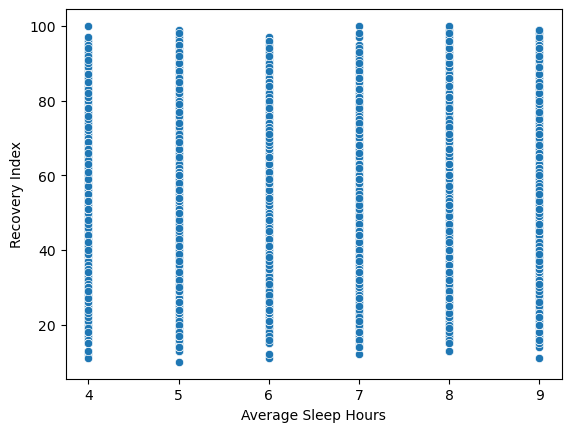

In [68]:
sns.scatterplot(data=train_df, x='Average Sleep Hours', y='Recovery Index')

<Axes: xlabel='Follow-Up Sessions', ylabel='Recovery Index'>

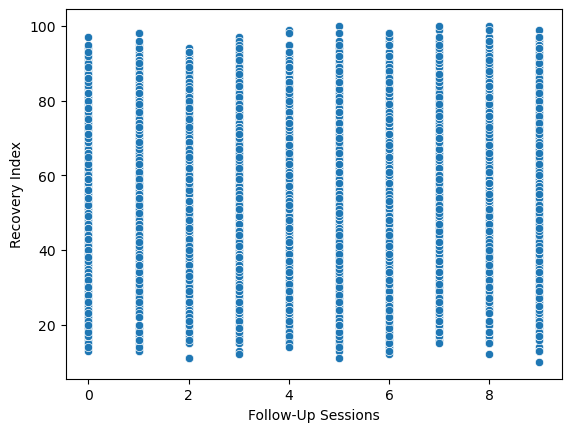

In [69]:
sns.scatterplot(data=train_df, x='Follow-Up Sessions', y='Recovery Index')

<Axes: xlabel='Lifestyle Activities_Yes', ylabel='Recovery Index'>

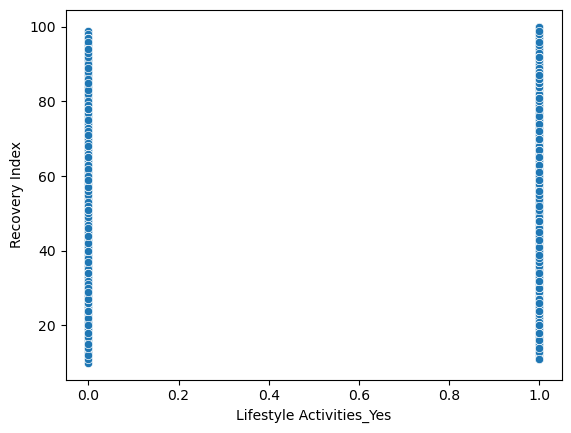

In [70]:
sns.scatterplot(data=processed_df, x='Lifestyle Activities_Yes', y='Recovery Index')

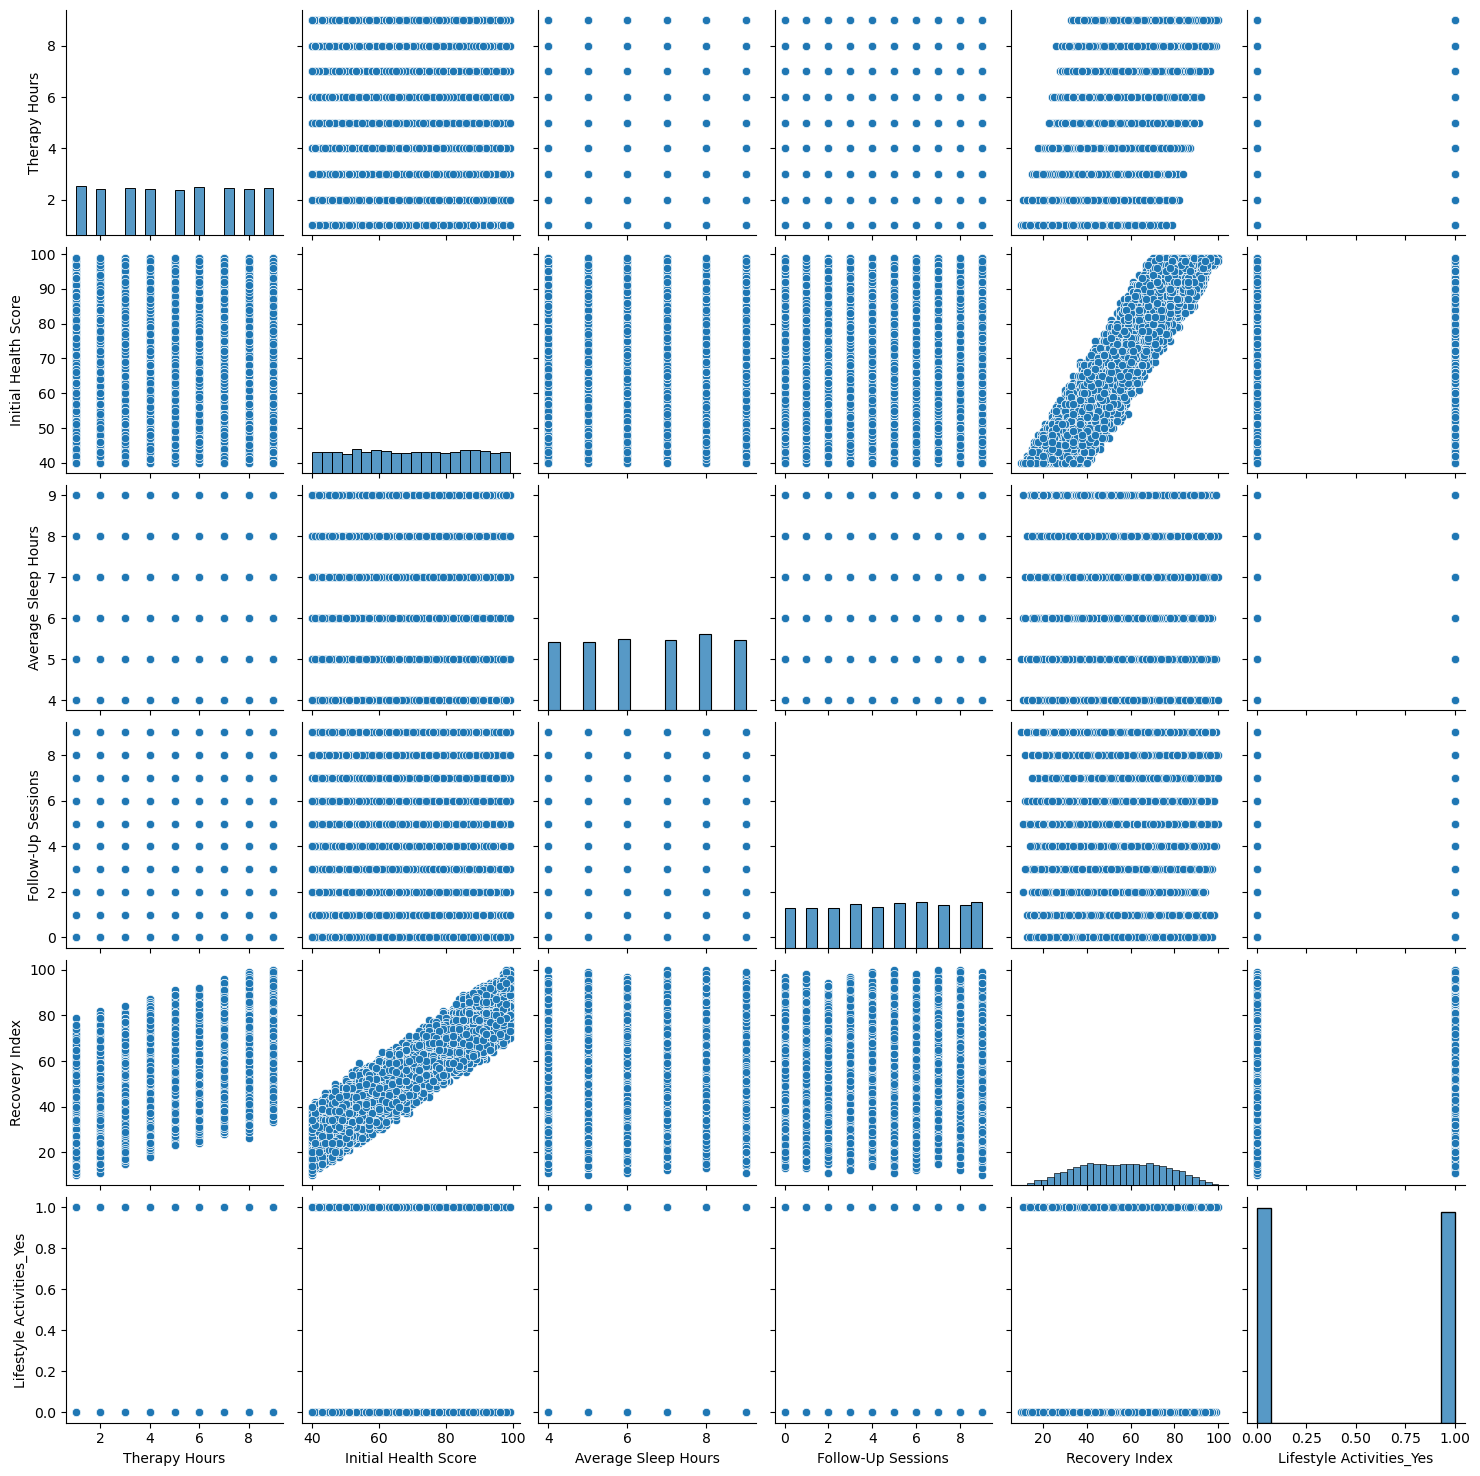

In [71]:
sns.pairplot(processed_df)

<Axes: xlabel='Average Sleep Hours', ylabel='Follow-Up Sessions'>

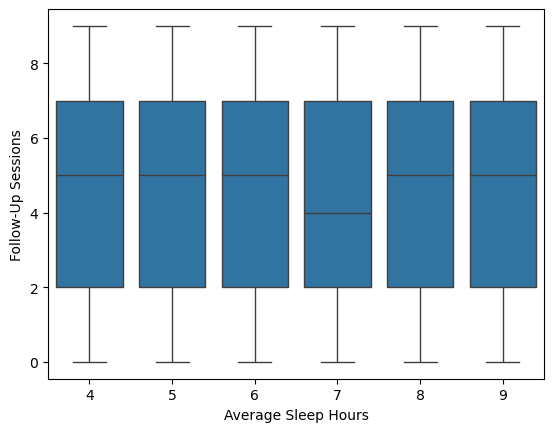

In [72]:
sns.boxplot(data=train_df, x="Average Sleep Hours", y="Follow-Up Sessions")

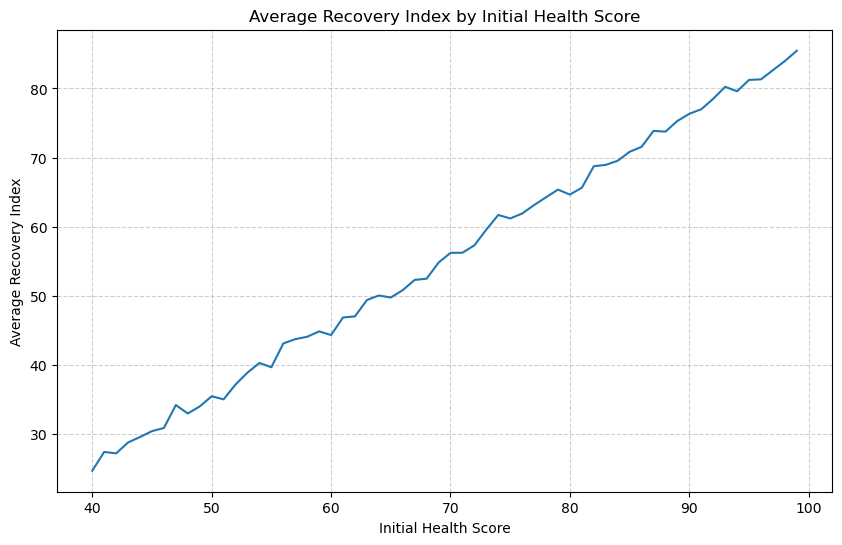

In [73]:
# 1. Group by score and get the mean of the other columns
avg_by_score = train_df.groupby('Initial Health Score').mean(numeric_only=True)

# 2. Plot the average 'Recovery Index' for each score
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_by_score, x=avg_by_score.index, y='Recovery Index')

# You could also plot other metrics
# sns.lineplot(data=avg_by_score, x=avg_by_score.index, y='Therapy Hours') 

plt.title('Average Recovery Index by Initial Health Score')
plt.ylabel('Average Recovery Index')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Data is very clean, no further preprocessing required

Just to see if any feature engineering helps to improve predictions, let's create some interaction features.

In [74]:
def build_reduced_features(df):
    eps = 1e-6
    X_raw = df.copy()

    if 'Id' in X_raw.columns:
        X_raw = X_raw.drop(columns=['Id'])
    
    def safe_float_series(s):
        return pd.to_numeric(s, errors='coerce').fillna(0.0).astype(float)
    
    
    if X_raw['Lifestyle Activities'].dtype == object:
        X_raw['Lifestyle Activities'] = X_raw['Lifestyle Activities'].map({'Yes': 1, 'No': 0})
    
    X_raw['Lifestyle Activities'] = safe_float_series(X_raw['Lifestyle Activities'])

    for c in ['Therapy Hours', 'Initial Health Score', 'Follow-Up Sessions', 'Average Sleep Hours']:
        X_raw[c] = safe_float_series(X_raw[c])
    

    X_eng = pd.DataFrame(index=X_raw.index)
    X_eng['Initial Health Score_p1'] = X_raw['Initial Health Score']
    X_eng['Therapy Hours_p1'] = X_raw['Therapy Hours']
    X_eng['Follow-Up Sessions_p1'] = X_raw['Follow-Up Sessions']
    X_eng['Average Sleep Hours_p1'] = X_raw['Average Sleep Hours']
    X_eng['Lifestyle Activities_p1'] = X_raw['Lifestyle Activities']
    X_eng['Average Sleep Hours_p2'] = X_raw['Average Sleep Hours'] ** 2
    X_eng['Average Sleep Hours_p3'] = X_raw['Average Sleep Hours'] ** 3
    X_eng['InitialHealthxSleep'] = X_raw['Initial Health Score'] * X_raw['Average Sleep Hours']
    X_eng['TherapyxSleep'] = X_raw['Therapy Hours'] * X_raw['Average Sleep Hours']
    X_eng['SleepxFollowUp'] = X_raw['Average Sleep Hours'] * X_raw['Follow-Up Sessions']
    X_eng['TherapyxHealth'] = X_raw['Therapy Hours'] * X_raw['Initial Health Score']
    X_eng['Therapy2xLifestyle'] = (X_raw['Therapy Hours'] ** 2) * X_raw['Lifestyle Activities']
    X_eng['TherapyxFollowUp'] = X_raw['Therapy Hours'] * X_raw['Follow-Up Sessions']
    X_eng['TherapyxLifestyle'] = X_raw['Therapy Hours'] * X_raw['Lifestyle Activities']
    X_eng['LifestylexSleep'] = X_raw['Lifestyle Activities'] * X_raw['Average Sleep Hours']
    X_eng['Therapy3xLifestyle'] = (X_raw['Therapy Hours'] ** 3) * X_raw['Lifestyle Activities']
    X_eng['HealthxLifestyle'] = X_raw['Initial Health Score'] * X_raw['Lifestyle Activities']
    X_eng['FollowUpxSleep'] = X_raw['Follow-Up Sessions'] * X_raw['Average Sleep Hours']
    X_eng['Sleep3_over_FollowUp'] = (X_raw['Average Sleep Hours'] ** 3) / (X_raw['Follow-Up Sessions'] + eps)
    X_eng['TherapyxLifestyle_sq'] = X_raw['Therapy Hours'] * (X_raw['Lifestyle Activities'] ** 2)
    X_eng['Therapy3_over_Health2'] = (X_raw['Therapy Hours'] ** 3) / ((X_raw['Initial Health Score'] ** 2) + eps)
    X_eng['LifestylexFollowUp2'] = X_raw['Lifestyle Activities'] * (X_raw['Follow-Up Sessions'] ** 2)
    
    return X_eng

In [75]:
processed_df2 = build_reduced_features(train_df)

In [76]:
processed_df2.head()

,Initial Health Score_p1,Therapy Hours_p1,Follow-Up Sessions_p1,Average Sleep Hours_p1,Lifestyle Activities_p1,Average Sleep Hours_p2,Average Sleep Hours_p3,InitialHealthxSleep,TherapyxSleep,SleepxFollowUp,...,TherapyxFollowUp,TherapyxLifestyle,LifestylexSleep,Therapy3xLifestyle,HealthxLifestyle,FollowUpxSleep,Sleep3_over_FollowUp,TherapyxLifestyle_sq,Therapy3_over_Health2,LifestylexFollowUp2
0,49.0,5.0,5.0,7.0,0.0,49.0,343.0,343.0,35.0,35.0,...,25.0,0.0,0.0,0.0,0.0,35.0,6.859999e+01,0.0,0.052062,0.0
1,48.0,2.0,6.0,7.0,1.0,49.0,343.0,336.0,14.0,42.0,...,12.0,2.0,7.0,8.0,48.0,42.0,5.716666e+01,2.0,0.003472,36.0
2,81.0,2.0,2.0,7.0,0.0,49.0,343.0,567.0,14.0,14.0,...,4.0,0.0,0.0,0.0,0.0,14.0,1.714999e+02,0.0,0.001219,0.0
3,46.0,2.0,1.0,6.0,0.0,36.0,216.0,276.0,12.0,6.0,...,2.0,0.0,0.0,0.0,0.0,6.0,2.159998e+02,0.0,0.003781,0.0
4,47.0,8.0,0.0,9.0,0.0,81.0,729.0,423.0,72.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7.290000e+08,0.0,0.231779,0.0


<Axes: >

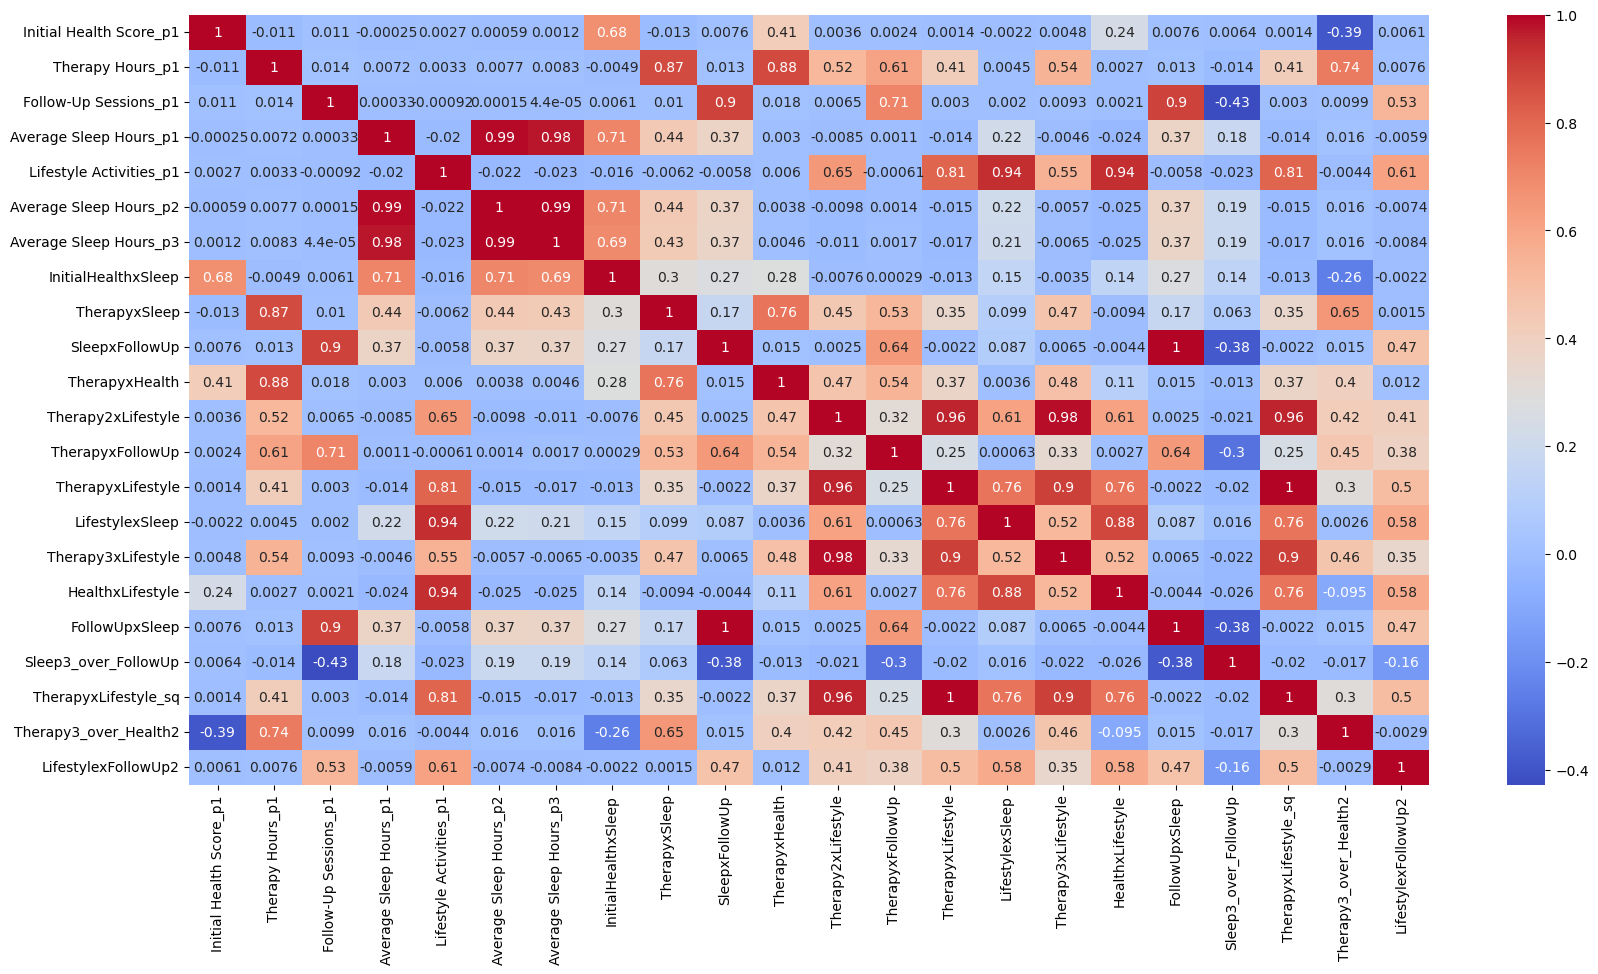

In [77]:
plt.figure(figsize=(20,10))
sns.heatmap(processed_df2.corr(), annot=True, cmap='coolwarm')